# Python Assignment

The code block below includes snippets of code for importing all the necessary packages and modules needed to run the assignment.

In [59]:
# Imports and Setup
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. Function Description
The function is calling a Fasta (``fasta_fn``) file using SeqIO.parse and the command ``get_sequence_from_file``. It will read the fasta file and extract the species name and sequence data. 
After the extraction step, the data will be stored in an empty dictionary. 

In [60]:
# 1. Get Sequences from FASTA File
## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work
"""
Function:
 This function reads a FASTA file, extracts species names and their corresponding sequences,
    and returns a dictionary mapping species names to their sequence data.
    
    Args:
    fasta_fn (string): Path to the FASTA file containing sequence data.
    
    Returns:
    dictionary: A dictionary where keys are species names and values are corresponding sequences.
    """


def get_sequences_from_file(fasta_fn):      #Function to read the FASTA file using the parameter ``fasta_fn`` and extract the biological sequences
    sequence_data_dict = {}             #Creates an empty disctionary to store the results
    for record in SeqIO.parse(fasta_fn, "fasta"): #SeqIO.parse is used to read the FASTA file. The for loops iterates, yieldind each sequence in the file.
        description = record.description.split()  #This describes the sequence and splits the description based on spaces
        species_name = description[1] + " " + description[2]    #Extract species name by combining the second and third words in the description
        sequence_data_dict[species_name] = record.seq       #Store the species name as the key and the sequence as the value in the dictionary
    return(sequence_data_dict)      #Return the dictionary containing species names and sequences

#### Testing Function
Here, I'm testing to see if the above function works as expected.

In [61]:
fasta_file = "penguins_cytb.fasta"  #File name or path to the FASTA file
sequences = get_sequences_from_file(fasta_file)  #Calls the function and stores the result in a variable

# Prints the result to check
print(sequences)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

## 2. Function to Translate Nucleotides to Amino Acids
This function translates a DNA sequence into its corresponding amino acid sequence. BioPython's `Seq.translate()` will automatically perform the translation based on the standard genetic code. This function is useful for predicting the protein sequence encoded by a DNA region.

https://medium.com/@aarunbhardwaj/how-to-use-the-biopython-seq-module-to-create-and-manipulate-biological-sequences-a381ec231061

In [62]:
#2
from Bio.Seq import Seq #imports the Seq class from the Bio.Seq module,

def translate_nucleotide_to_amino_acid(nucleotide_sequence):
    """
    This function translates a given nucleotide sequence into an amino acid sequence.
    
    Args:
    nucleotide_sequence (str): A string representing the nucleotide sequence (DNA).
    
    Returns:
    str: The corresponding amino acid sequence.
    """
    dna_seq = Seq(nucleotide_sequence)  # Create a Seq object from the nucleotide string
    amino_acid_sequence = dna_seq.translate()  # Translate the DNA sequence to amino acids
    return str(amino_acid_sequence)  # Return the amino acid sequence as a string


#### Testing Function
Here, I'm testing to see if the above function works as expected.

In [63]:
#Calling function ``translate_nucleotide_to_amino_acid()``
nucleotide_seq = "ATGGCCATTGTAAGGGCCGCGAAGGGTGCCGAT"
amino_acids = translate_nucleotide_to_amino_acid(nucleotide_seq)
print("Amino acid sequence:", amino_acids)

Amino acid sequence: MAIVRAAKGAD


## 3. Alternative Translation Function

This function lists the codons that encode each amino acid. It serves as an alternative to using built-in translation methods. This approach involves mapping each codon (a triplet of nucleotides) to its corresponding amino acid using a dictionary.

In [64]:
#3
def manual_translate_nucleotide_to_amino_acid(nucleotide_sequence):
    """
    This function manually translates a given nucleotide sequence into an amino acid sequence 
    based on the standard genetic code.
    
    Args:
    nucleotide_sequence (str): A string representing the nucleotide sequence (DNA).
    
    Returns:
    str: The corresponding amino acid sequence.
    """
    codon_to_amino_acid = {
        "ATA": "I", "ATC": "I", "ATT": "I", "ATG": "M", "ACA": "T", "ACC": "T",
        "ACG": "T", "ACT": "T", "AAC": "N", "AAT": "N", "AAA": "K", "AAG": "K",
        "AGC": "S", "AGT": "S", "AGA": "R", "AGG": "R", "CTA": "L", "CTC": "L",
        "CTG": "L", "CTT": "L", "CCA": "P", "CCC": "P", "CCG": "P", "CCT": "P",
        "CAC": "H", "CAT": "H", "CAA": "Q", "CAG": "Q", "CGA": "R", "CGC": "R",
        "CGG": "R", "CGT": "R", "GTA": "V", "GTC": "V", "GTG": "V", "GTT": "V",
        "GCA": "A", "GCC": "A", "GCG": "A", "GCT": "A", "GAC": "D", "GAT": "D",
        "GAA": "E", "GAG": "E", "GGA": "G", "GGC": "G", "GGG": "G", "GGT": "G",
        "TCA": "S", "TCC": "S", "TCG": "S", "TCT": "S", "TTC": "F", "TTT": "F",
        "TTA": "L", "TTG": "L", "TAC": "Y", "TAT": "Y", "TAA": "*", "TAG": "*",
        "TGC": "C", "TGT": "C", "TGA": "*", "TGG": "W"
    }
    
    amino_acids = []
    for i in range(0, len(nucleotide_sequence), 3):
        codon = nucleotide_sequence[i:i+3]
        amino_acids.append(codon_to_amino_acid.get(codon, "X"))  # X for unknown codons
    
    return ''.join(amino_acids)


#### Testing Function
Here, I'm testing to see if the above function works as expected.

In [65]:
#Calling function ``manual_translate_nucleotide_to_amino_acid()``
nucleotide_seq = "ATGGCCATTGAATGGGCCGCTGAAGTTTCCTTGGAAAAAGGTGCCCGATG"
manual_aa_seq = manual_translate_nucleotide_to_amino_acid(nucleotide_seq)
print("Manual translation:", manual_aa_seq)

Manual translation: MAIEWAAEVSLEKGARX


## 4. Calculate Molecular Weight of Amino Acid Sequences

This function calculates the molecular weight of a protein sequence using the `molecular_weight()` function from BioPython's `SeqUtils`. 

In [66]:
#4

from Bio.SeqUtils.ProtParam import ProteinAnalysis

def calculate_molecular_weight(amino_acid_sequence):
    """
    This function calculates the molecular weight of a given amino acid sequence.
    
    Args:
    amino_acid_sequence (str): A string representing the amino acid sequence.
    
    Returns:
    float: The molecular weight of the amino acid sequence.
    """
    return bio_mw(amino_acid_sequence, seq_type='protein')

#### Testing Function
Here, I'm testing to see if the above function works as expected.

In [67]:
#Calling function ``calculate_molecular_weight()``
test_peptide = "MAI"
weight = calculate_molecular_weight(test_peptide)
print(f"Molecular weight of '{test_peptide}': {weight:.2f} Da")

Molecular weight of 'MAI': 333.45 Da


## 5. Compute GC-Content of DNA Sequences

GC-content is the percentage of guanine (G) and cytosine (C) bases in a DNA sequence. This function calculates GC-content as a percentage, providing insights into the composition of DNA sequences.


In [68]:
#5
def calculate_gc_content(dna_sequence):
    """
    This function calculates the GC-content of a given DNA sequence.
    
    Args:
    dna_sequence (str): A string representing the DNA sequence.
    
    Returns:
    float: The GC-content as a percentage.
    """
    gc_count = dna_sequence.count('G') + dna_sequence.count('C')  #Counts G and C
    total_length = len(dna_sequence)  #Gives the length of the sequence
    gc_content = (gc_count / total_length) * 100  #Calculates the GC content percentage
    return gc_content


#### Testing Function
Here, I'm testing to see if the above function works as expected.

In [69]:
#Calling function ``calculate_gc_content()``
dna_seq = "ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG"
gc_content = calculate_gc_content(dna_seq)
print(f"GC-content: {gc_content:.2f}%")

GC-content: 56.41%


### Loading Data
The code below loads the penguins data sequences from a `FASTA file` and reads it from a CSV file using pandas. The species names are extracted into a list for further analysis. Additionally, the script imports functions from Biopython to compute the `molecular weight` and `GC content` of the sequences.

In [70]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") # Loads the sequences from theh file `penguins_cytb.fasta' using the get_sequences_from_file command.

penguins = pd.read_csv("penguins_mass.csv") # Loading penguins DataFrame 
species_list = list(penguins.species) # Extracts the species column as a list called species_list.

from Bio.SeqUtils import molecular_weight as bio_mw, gc_fraction # Imports the functions molecular_weight and gc_fraction for calculating the molecular weight and GC cnontent in the penguins data.

In [71]:
penguins.columns # Prints the columns in the dataframe, penguins.

Index(['species', 'mass'], dtype='object')

## 6. Addition of Columns
Two new columns were added to the `penguins` dataframe:
- `molecular_weight`: This will store the molecular weight of the translated cytochrome b protein.
- `GC_content`: This will store the GC-content (%) of each DNA sequence.

These columns were initially set to `NaN` and will be updated in the next step.

In [72]:
#6. Adding 2 columns
penguins['molecular_wgt'] = np.nan #Adding column for molecular weight and intializing all cells to take the value NaN
penguins['GC_content'] = np.nan #Adding column for GC_content and intializing all cells to take the value NaN
penguins.head()            #Printing the first set of lines in the dataframe

,species,mass,molecular_wgt,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN


## 7. Calculating the Molecular Weight and GC_Content  
This `for` loop iterates through each row in the `penguins` dataframe as values from calculating the molecular weight and GC content is added to the columns. It does this by retrieving the species name and uses it to get the corresponding DNA sequence from `cytb_seqs` with teh function `translate_nucleotide_to_amino_acid`. 
 Finally, the code displays the first few rows of the updated dataframe using `.head()`.

In [73]:
for i, row in penguins.iterrows():   #for loop iterates through the dataframe
    species = row["species"]     #Extracting the species name in a row
    seq = cytb_seqs.get(species)  #Retrives the sequence from cytb_seqs for each specie
    if seq:      #Checks to see if a sequence is present
        aa_seq = translate_nucleotide_to_amino_acid(seq).replace("*", "") #Uses the `translate_nucleotide_to_amino_acid' function to translate the DNA sequence and removes teh stop code that may be present
        mol_weight = calculate_molecular_weight(aa_seq)   #This calculates the molecular weight
        GC_content = calculate_gc_content(seq)    #This calculates the GC content
        penguins.at[i, 'molecular_wgt'] = mol_weight #Adding the calculated molecular weight to the column molecular_wgt
        penguins.at[i, 'GC_content'] = GC_content    #Adding the calculated GC content to the column GC_content

penguins.head()    #Prints the head part of the updated dataframe

,species,mass,molecular_wgt,GC_content
0,Aptenodytes forsteri,28.00,40471.2343,48.381452
1,Aptenodytes patagonicus,13.40,40743.5104,49.693788
2,Eudyptes chrysocome,2.80,40709.4942,51.181102
3,Eudyptes chrysolophus,4.50,40865.6781,50.918635
4,Eudyptes sclateri,4.25,40709.4942,50.831146


## 8. Plot Body Mass per Species
The code generates a bar plot using Seaborn and Matplotlib to visualize the average adult body mass of different penguin species. It customizes the plot's appearance with a white grid background, sets figure size, rotates x-axis labels for readability, and includes a descriptive title and axis label before displaying the plot.


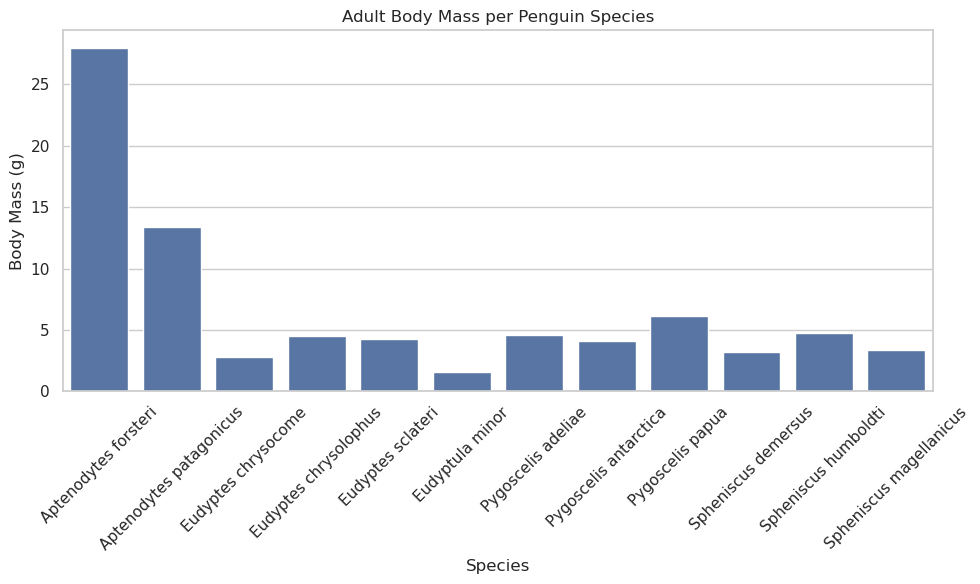

Q1: The smallest penguin species is the 'Eudyptula minor' with an average body mass of 1.60 g.
Q2. They are geographically distributed in: The smallest penguin species is geographically located in the coastlines of Southern Australia and New Zealand.


In [74]:
# 8. Plot Body Mass per Species

sns.set(style='whitegrid')   #Setting a grid style to be used for the plot
plt.figure(figsize=(10, 6))   #This creates a new figure with a height of 6 inches and width of 10 inches
sns.barplot(x='species', y='mass', data=penguins)   #This creates a bar plot of body mass for each species in the penguins dataframe.
plt.title('Adult Body Mass per Penguin Species')   #Adds a title to the plot.
plt.ylabel('Body Mass (g)')   #Labels the y-axis as Body Mass (g)
plt.xlabel('Species')   #Labels the y-axis as Species
plt.xticks(rotation=45)  #Rotates the x-axis tick labels by 45 degrees
plt.tight_layout()  #Adjusts the subplot parameters to prevent overlapping
plt.show()    #Prints the plot

# Answers to Questions
# Q1. Find the smallest penguin species by minimum average body mass using groupby
smallest_species = penguins.groupby("species")["mass"].mean().idxmin()
smallest_mass = penguins.groupby("species")["mass"].mean().min()

# Print the answer
print(f"Q1: The smallest penguin species is the '{smallest_species}' with an average body mass of {smallest_mass:.2f} g.")


# Q2: Geographical range of the smallest species
geographical_range = "The smallest penguin species is geographically located in the coastlines of Southern Australia and New Zealand."
# Print the answer
print(f"Q2. They are geographically distributed in: {geographical_range}")

## 9. Graph of Molecular Weight Vs. GC content
The code creates a scatter plot showing the relationship between `GC_content` and `molecular weight` for different `penguin` species. Each point represents an individual entry from the dataset, colored by species. The plot includes labeled axes, a title, and a legend positioned outside the main plot area for clarity.


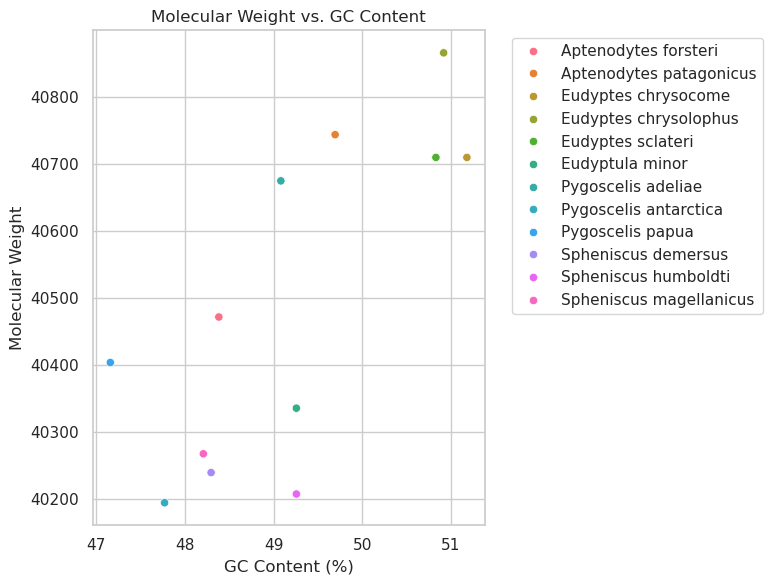

In [75]:
#9
plt.figure(figsize=(8, 6))    #This creates a new figure with a height of 6 inches and width of 8 inches
sns.scatterplot(data=penguins, x='GC_content', y='molecular_wgt', hue='species')  #This creates a bar plot of body mass for each species in the penguins dataframe.
plt.title('Molecular Weight vs. GC Content')   #Adds a title to the plot
plt.xlabel('GC Content (%)')    #Labels the x-axis as GC Content (%)
plt.ylabel('Molecular Weight')   #Labels the y-axis as Molecular Weight
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')   #Positions the legend outside the main plot area
plt.tight_layout()     #Adjusts the subplot parameters to prevent overlapping
plt.show()    #Prints the plot

## 10. Saving the Dataset
The dataset in the dataframe `penguins` was saved into a CSV file.

In [76]:
# 10. Save to CSV
penguins.to_csv("penguins_mass_cytb.csv", index=False)

## 11. Heatmap Visualization
This code generates a heatmap to visualize the correlation between numerical features in the `penguins` dataframe. It excludes the categorical `species` column, calculates the correlation matrix, and uses Seaborn to display the relationships with annotated values and a "coolwarm" color scheme. The plot is titled and adjusted for a clean layout before being displayed.
https://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up

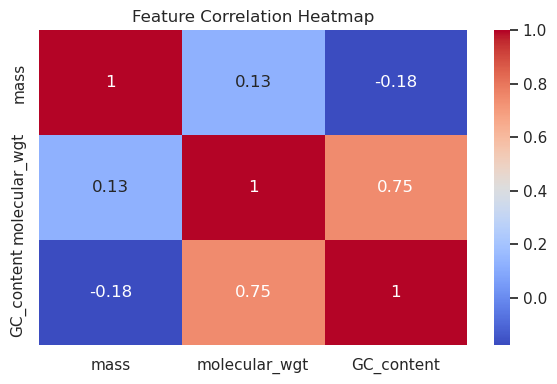

In [77]:
#11
plt.figure(figsize=(6, 4))   #This creates a new figure with a height of 4 inches and width of 6 inches
sns.heatmap(penguins.drop(columns=["species"]).corr(), annot=True, cmap="coolwarm")  #Applies the coolwarm color scheme to create a heatmap which excludes the species column and displays teh correlation coefficients
plt.title("Feature Correlation Heatmap")   #Adds a title to the plot
plt.tight_layout()     #Adjusts the subplot parameters to prevent overlapping
plt.show()    #Prints the plot